# Customer Churn Analysis for a Telecommunications Company

## Introduction

In the dynamic and competitive telecommunications industry, customer retention has become increasingly crucial. This project is centered on analyzing customer churn, which occurs when clients discontinue their service. By studying historical data, we aim to discover underlying patterns and identify the key factors contributing to churn. These insights will enable the company to develop effective strategies for improving customer loyalty and minimizing churn rates.


## Business Problem and the Objectives
To help the company understand the historical data and patterns of their customers I endevour to understand and perform the following:-

- Examine the structure and quality of the customer dataset.
- Perform exploratory data analysis (EDA) to reveal trends and influencing factors behind churn.
- Prepare the dataset for machine learning through appropriate preprocessing techniques.
- Develop predictive models to classify customers likely to churn.
- Interpret results to provide actionable business recommendations.

##  LOADING OF THE DATA

In [61]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [62]:
#Showing all columns in the dataset
pd.set_option('display.max_columns', 30)
#reading the dataset
df = pd.read_csv("charn_data.csv")
#displaying the first five rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
#Analyzing the 'phone number' column
df['phone number'].isnull().sum()  # Checking for null values in the 'phone number' column
df['phone number'].nunique()  # Counting unique phone numbers
df['phone number'].value_counts().sort_values(ascending = False)

399-1750    1
419-1674    1
401-3926    1
329-8436    1
343-3356    1
           ..
330-4419    1
358-2490    1
400-7002    1
380-4374    1
328-9315    1
Name: phone number, Length: 3333, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [64]:
## Displaying the columns of the DataFrame
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [65]:
# Displaying the shape of the DataFrame
df.shape

(3333, 21)

In [66]:
# Displaying the summary statistics of the DataFrame
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [67]:
# Displaying the summary statistics for categorical columns
df.describe(include=["object"])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,328-9315,no,no
freq,106,1,3010,2411


In [68]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### UNIVARIATE ANALYSIS

In [69]:
# Showing state-wise distribution of clients
# Counting the number of clients in each state
cols = ['state', 'no_of_clients']
clients_per_state = pd.DataFrame(df["state"].value_counts().reset_index())
clients_per_state.columns = cols
clients_per_state.head()

,state,no_of_clients
0,WV,106
1,MN,84
2,NY,83
3,AL,80
4,OR,78


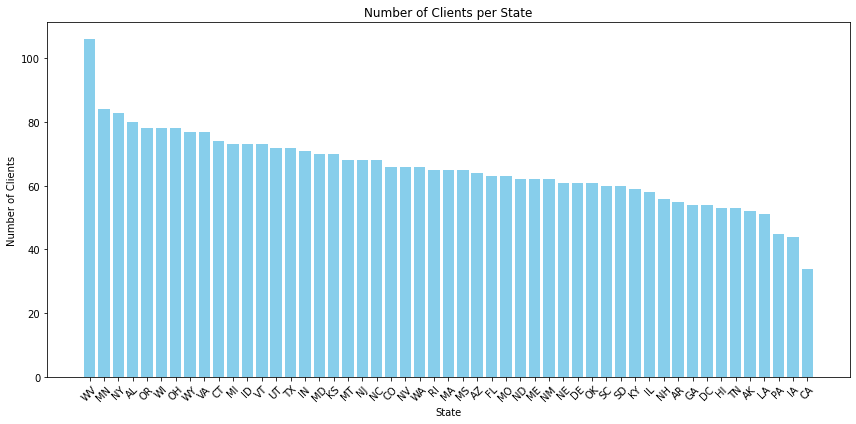

In [70]:
# Visualizing the number of clients per state using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(clients_per_state['state'], clients_per_state['no_of_clients'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Clients')
plt.title('Number of Clients per State')
plt.xticks(rotation=45)
plt.tight_layout()

#!pip install plotly
import plotly.express as px

In [71]:

# Creating a bar chart to visualize the total number of call days per state
fig = px.bar(clients_per_state,
    x = 'state',
    y = 'no_of_clients',
    title = "TOTAL NUMBER OF DAYS PER STATE"
)
fig.update_layout(
    title = dict(text = "<b>TOTAL CALL DAYS PER STATE</b>", x = 0.5, xanchor = 'center')
)
fig.update_traces(marker_color='orange')
fig.show()

## BIVARIATE ANALYSIS

In [72]:

#This cell calculates the total day minutes for each state in an aggregated format
import numpy as np
state_tdm = pd.DataFrame(df.groupby('state')['total day minutes']\
                           .agg('sum'))\
                           .sort_values(ascending = False, by = 'total day minutes')\
                           .reset_index()
# Displaying the first five rows of the state_tdm DataFrame
state_tdm.head()

,state,total day minutes
0,WV,18438.8
1,MN,15401.8
2,AL,14880.8
3,NY,14534.5
4,OH,14295.4


In [73]:
#Calculation of total day minutes as whole day values
state_calls_in_days = state_tdm.copy()
state_calls_in_days['total day minutes']= state_calls_in_days['total day minutes']/1440

In [74]:
# Renaming the columns for clarity
x = ['state', 'total_day_calls']
state_calls_in_days.columns = x
state_calls_in_days.head()

,state,total_day_calls
0,WV,12.804722
1,MN,10.695694
2,AL,10.333889
3,NY,10.093403
4,OH,9.927361


In [75]:
#This will give the day calculation in a series but not mirroring it to the copied dataset
state_calls_in_days['total_day_calls']/1440
state_calls_in_days.head()

,state,total_day_calls
0,WV,12.804722
1,MN,10.695694
2,AL,10.333889
3,NY,10.093403
4,OH,9.927361


In [76]:
state_calls_in_days.columns

Index(['state', 'total_day_calls'], dtype='object')

In [77]:
fig = px.bar(state_calls_in_days,
    x = 'state',
    y = 'total_day_calls',
    title = "TOTAL CALL DAYS PER STATE"
)
fig.update_layout(
    title = dict(text = "<b>TOTAL CALL TIME IN DAYS PER STATE</b>", x = 0.5, xanchor = 'center')
)
fig.show()

### CALL SESSIONS ANALYTICS
#### Evening Analytics

In [78]:
evening = df[["total eve minutes", "total eve calls", "total eve charge"]]

In [79]:
evening

,total eve minutes,total eve calls,total eve charge
0,197.4,99,16.78
1,195.5,103,16.62
2,121.2,110,10.30
3,61.9,88,5.26
4,148.3,122,12.61
...,...,...,...
3328,215.5,126,18.32
3329,153.4,55,13.04
3330,288.8,58,24.55
3331,159.6,84,13.57


In [80]:
evening.describe()

,total eve minutes,total eve calls,total eve charge
count,3333.000000,3333.000000,3333.000000
mean,200.980348,100.114311,17.083540
std,50.713844,19.922625,4.310668
min,0.000000,0.000000,0.000000
25%,166.600000,87.000000,14.160000
50%,201.400000,100.000000,17.120000
75%,235.300000,114.000000,20.000000
max,363.700000,170.000000,30.910000


##### Code for Evening Calls

In [81]:
ev = evening['total eve minutes'].sum() / evening['total eve charge'].sum()
ev

11.764560733298396

In [82]:
tot_ev_mins = evening["total eve minutes"].sum()
tot_ev_mins

669867.5

In [83]:
tot_ev_hrs = tot_ev_mins/60
tot_ev_hrs = tot_ev_hrs.round(2)
tot_ev_hrs

11164.46

#### Day Analytics

In [84]:
day = df[['total day minutes', 'total day calls', 'total day charge']]
day.head()

,total day minutes,total day calls,total day charge
0,265.1,110,45.07
1,161.6,123,27.47
2,243.4,114,41.38
3,299.4,71,50.90
4,166.7,113,28.34


In [85]:
day.describe()

,total day minutes,total day calls,total day charge
count,3333.000000,3333.000000,3333.000000
mean,179.775098,100.435644,30.562307
std,54.467389,20.069084,9.259435
min,0.000000,0.000000,0.000000
25%,143.700000,87.000000,24.430000
50%,179.400000,101.000000,30.500000
75%,216.400000,114.000000,36.790000
max,350.800000,165.000000,59.640000


##### Cost during the day

In [86]:
d = day['total day minutes'].sum() / day['total day charge'].sum()
d

5.882248881034419

In [87]:
tot_day_mins = day["total day minutes"].sum()
tot_day_hrs = tot_day_mins/60

In [88]:
tot_day_hrs = tot_day_mins/60
tot_day_hrs = tot_day_hrs.round(2)
tot_day_hrs

9986.51

#### Night Analytics

In [89]:
night = df[['total night minutes', 'total night calls', 'total night charge']]
night.head()

,total night minutes,total night calls,total night charge
0,244.7,91,11.01
1,254.4,103,11.45
2,162.6,104,7.32
3,196.9,89,8.86
4,186.9,121,8.41


In [90]:
night.describe()

,total night minutes,total night calls,total night charge
count,3333.000000,3333.000000,3333.000000
mean,200.872037,100.107711,9.039325
std,50.573847,19.568609,2.275873
min,23.200000,33.000000,1.040000
25%,167.000000,87.000000,7.520000
50%,201.200000,100.000000,9.050000
75%,235.300000,113.000000,10.590000
max,395.000000,175.000000,17.770000


##### Cost During the Night

In [91]:
nht = night['total night minutes'].sum() / night['total night charge'].sum()
nht

22.222017540453137

In [92]:
tot_nht_mins = night["total night minutes"].sum()
tot_nht_hrs = tot_nht_mins/60

In [93]:
tot_nht_hrs = tot_nht_mins/60
tot_nht_hrs = tot_nht_hrs.round(2)
tot_nht_hrs

11158.44

#### International Analytics

In [94]:
intl = df[['total intl minutes', 'total intl calls', 'total intl charge']]

In [95]:
intl.head()

,total intl minutes,total intl calls,total intl charge
0,10.0,3,2.70
1,13.7,3,3.70
2,12.2,5,3.29
3,6.6,7,1.78
4,10.1,3,2.73


In [96]:
intl.describe()

,total intl minutes,total intl calls,total intl charge
count,3333.000000,3333.000000,3333.000000
mean,10.237294,4.479448,2.764581
std,2.791840,2.461214,0.753773
min,0.000000,0.000000,0.000000
25%,8.500000,3.000000,2.300000
50%,10.300000,4.000000,2.780000
75%,12.100000,6.000000,3.270000
max,20.000000,20.000000,5.400000


##### Cost for International Calls

In [97]:
itl = intl['total intl minutes'].sum() / intl['total intl charge'].sum()
itl

3.7030175758463706

In [98]:
tot_itl_mins = intl["total intl minutes"].sum()
tot_itl_hrs = tot_itl_mins/60

In [99]:
tot_itl_hrs = tot_itl_mins/60
tot_itl_hrs = tot_itl_hrs.round(2)
tot_itl_hrs

568.68

#### Aggregation for Call Analytics

In [100]:
time_costs = [ev, d, nht, itl]

In [101]:
time_costs

[11.764560733298396, 5.882248881034419, 22.222017540453137, 3.7030175758463706]

In [102]:
session = ["Evening", "Day", "Night", "International"]

In [103]:
mg = pd.DataFrame([session, time_costs])
mg

,0,1,2,3
0,Evening,Day,Night,International
1,11.7646,5.88225,22.222,3.70302


In [104]:
cols = ["call_type", "cost"]
times = mg.T
times.columns = cols
times = times.sort_values(by = 'cost', ascending = False)

In [105]:
times

,call_type,cost
2,Night,22.222
0,Evening,11.7646
1,Day,5.88225
3,International,3.70302


In [106]:
fig = px.pie(times, names = "call_type", values = "cost", title = "<b>COST OF CALLS PER CATEGORY</b>")

fig.update_layout(
    title = dict(text = "<b>COST OF CALLS PER CATEGORY</b>", x = 0.5, xanchor = 'center'))

fig.update_layout(width = 500, height = 500)
fig.show()

In [107]:
tot_hrs = [tot_ev_hrs,tot_day_hrs, tot_nht_hrs, tot_itl_hrs]

In [108]:
tot_hrs

[11164.46, 9986.51, 11158.44, 568.68]

In [109]:
session = ["Evening", "Day", "Night", "International"]

In [110]:
cols2 = ["session", "no_of_hours"]
mg2 = pd.DataFrame([session, tot_hrs])
mg3 = mg2.T
mg3.columns = cols2
mg3.sort_values(by = "no_of_hours", ascending = False)

,session,no_of_hours
0,Evening,11164.5
2,Night,11158.4
1,Day,9986.51
3,International,568.68


In [111]:
fig = px.pie(mg3, names = "session", values = "no_of_hours", title = "<b>NUMBER OF HOURS PER CALL CATEGORY</b>")

fig.update_layout(
    title = dict(text = "<b>NUMBER OF HOURS PER CALL CATEGORY</b>", x = 0.5, xanchor = 'center'))

fig.update_layout(width = 500, height = 500)
fig.show()

Their business model needs to change
From the analysis, it is evident that the cost of night calls is significantly lower than other call types, despite having the highest number number of hours spent on them. This suggests that the business model may need to be adjusted to better accommodate customer needs and preferences, particularly in terms of attracting the most clients.
Makes no sense to have the highest number of hours spent on night calls and evening calls, yet the cost is higherr than other call types. This indicates a potential misalignment between customer usage patterns and the pricing strategy, which could lead to lost revenue opportunities for the business.